## Waste management using cnn model

In [1]:
pip install opencv-python 

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install tensorflow 

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# Implimenting Various Libraries
import numpy as np
import pandas as pd
import cv2
import warnings 
warnings.filterwarnings('ignore')
from tqdm import tqdm
from glob import glob


In [4]:
pip install matplotlib 


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import matplotlib.pyplot as plt


In [6]:
train_path = r"C:\Users\chinn\OneDrive\Desktop\DATASET\Week-1\dataset\TRAIN"
test_path = r"C:\Users\chinn\OneDrive\Desktop\DATASET\Week-1\dataset\TEST"

In [7]:
# Importing Libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D,Activation,Dropout,Flatten,Dense,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img
from tensorflow.keras.utils import plot_model
import glob


In [8]:
import os
print("Train path exists:", os.path.exists(train_path))

Train path exists: True


In [9]:
from tensorflow.keras.layers import Conv2D


In [10]:
# Visualization
from glob import glob
from cv2 import cvtColor
x_data = []
y_data = []
for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array = cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split('/')[-1])
data = pd.DataFrame({'image':x_data, 'label':y_data})

100%|██████████| 9999/9999 [00:11<00:00, 837.45it/s]


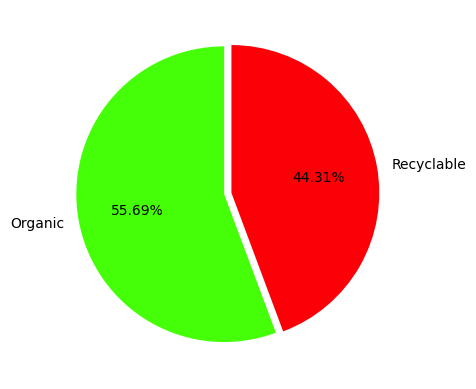

In [11]:
data.shape
colors =['#44FF07','#FB0007']
plt.pie(data.label.value_counts(),labels=['Organic', 'Recyclable'] , startangle=90 , colors=colors,explode=[0,0.05], autopct='%0.2f%%')
plt.show()


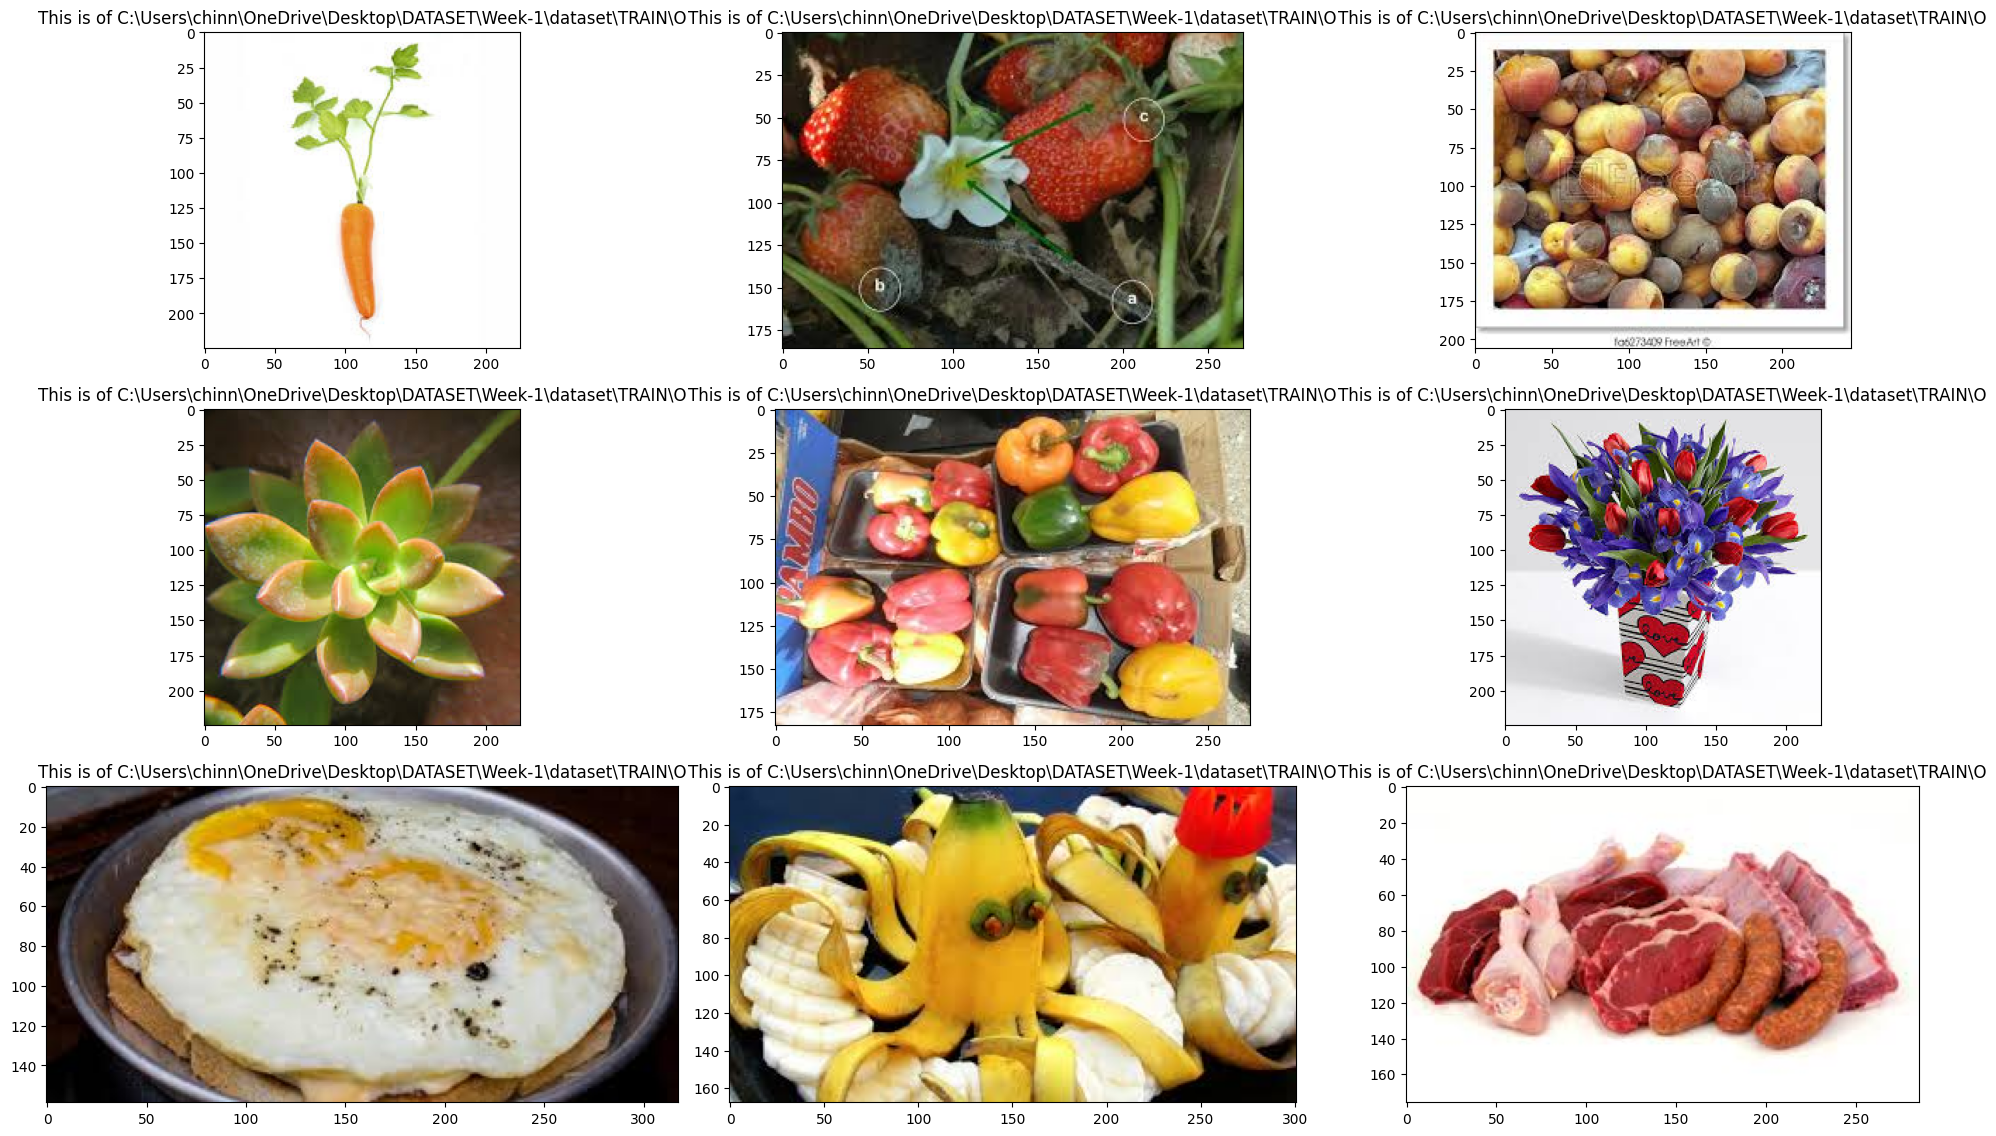

In [12]:
plt.figure(figsize=(20, 15))
for i in range(9):
    plt.subplot(4, 3,(i%12)+1)
    index = np.random.randint(15000)
    plt.title('This is of {0}'.format(data.label[index]))
    plt.imshow(data.image[index])
    plt.tight_layout()

## CNN - Convolutional Neural Network WEEK2

In [13]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(loss = "binary_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])
batch_size = 256

In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 222, 222, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 109, 109, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 52, 52, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 2)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,261,250 (84.92 MB)

 Trainable params: 22,261,250 (84.92 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Data Augmentation to reduce overfitting
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

In [16]:
# Data Loading
train_generator = train_datagen.flow_from_directory(
    r"C:\Users\chinn\OneDrive\Desktop\DATASET\Week-1\dataset\TRAIN",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    r"C:\Users\chinn\OneDrive\Desktop\DATASET\Week-1\dataset\TEST",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [17]:
!pip install scipy


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Epoch 1/20
706/706 ━━━━━━━━━━━━━━━━━━━━ 13143s 19s/step - accuracy: 0.7171 - loss: 6.7407 - val_accuracy: 0.8118 - val_loss: 1.8017 - learning_rate: 0.0010
Epoch 2/20
706/706 ━━━━━━━━━━━━━━━━━━━━ 3369s 5s/step - accuracy: 0.8156 - loss: 1.6019 - val_accuracy: 0.7628 - val_loss: 1.0877 - learning_rate: 0.0010
Epoch 3/20
706/706 ━━━━━━━━━━━━━━━━━━━━ 1030s 1s/step - accuracy: 0.8171 - loss: 1.0176 - val_accuracy: 0.8368 - val_loss: 0.8688 - learning_rate: 0.0010
Epoch 4/20
706/706 ━━━━━━━━━━━━━━━━━━━━ 2113s 3s/step - accuracy: 0.8265 - loss: 0.9262 - val_accuracy: 0.8460 - val_loss: 0.8226 - learning_rate: 0.0010
Epoch 5/20
706/706 ━━━━━━━━━━━━━━━━━━━━ 1049s 1s/step - accuracy: 0.8285 - loss: 0.8272 - val_accuracy: 0.8607 - val_loss: 0.7905 - learning_rate: 0.0010
Epoch 6/20
706/706 ━━━━━━━━━━━━━━━━━━━━ 1225s 2s/step - accuracy: 0.8345 - loss: 0.7999 - val_accuracy: 0.7919 - val_loss: 0.8034 - learning_rate: 0.0010
Epoch 7/20
706/706 ━━━━━━━━━━━━━━━━━━━━ 2058s 3s/step - accuracy: 0.8388 -

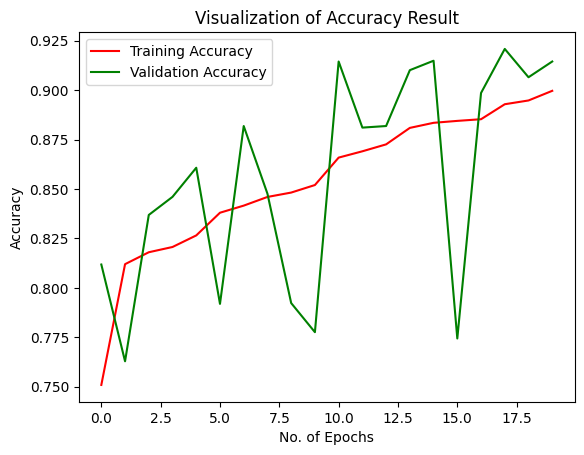

In [20]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
# Model Architecture
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3), kernel_regularizer=l2(0.001)),
    BatchNormalization(),  # New
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),  # New
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),  # New
    MaxPooling2D(2,2),

    Flatten(),
    Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),  # New Dropout Layer

    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),  # New Dropout Layer

    Dense(train_generator.num_classes, activation='softmax')  # Output Layer
])

# Step 4: Compile Model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

#Step 5: Learning Rate Scheduler 
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', patience=2, factor=0.5, min_lr=1e-6
)

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=3, restore_best_weights=True
)

# Step 6: Train Model
hist = model.fit(
    train_generator,
    epochs=20,  # Increase if needed
    validation_data=test_generator,
    steps_per_epoch=len(train_generator),
    validation_steps=len(test_generator),
    callbacks=[early_stopping, lr_scheduler]
)

# Step 7: Plot Results 
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'], label='Training Accuracy', color='red')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy', color='green')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Visualization of Accuracy Result")
plt.show()